# Analysis of Mood Disorders 
## BANA 6043: Statistical Computing 
### Brett Karsten & Anna Setsaas 

### Part 1 & 2: Exploratory Data Analysis / Data Pre-Processing & Wrangling

In [61]:
# 1.1 import libraries 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# these are the main libraries we will be using for data analysis, more machine learning libraries will be loaded when they are needed for specific steps 

In [62]:
# 1.2 load dataset 

mood_data = pd.read_csv('MoodDisorders.csv')

/var/folders/cg/z83d3rpj69q9d9y8p2275mnw0000gn/T/ipykernel_1203/592752180.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  mood_data = pd.read_csv('MoodDisorders.csv')


### 1.3 Exploratory Data Analysis 

This section will explore the data set and produce meaningful summary statistics / visualizations based on the data provided.

In [63]:
# display the data 

mood_data

,PersonNum,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,Person-1,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Person-2,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Person-3,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Person-4,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Person-5,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Excluding the index, there is `PersonNum` as a variable, this column should be removed to preserve privacy.

In [64]:
# 1.3.1 Remove identifiable features to preserve privacy

mood_data = mood_data.drop(columns='PersonNum') # drop the entire column

In [65]:
# 1.3.2 Data Dimensions

mood_data.shape

(1048575, 18)

From the output above we can see that there are `1,048,575` rows within this data set. There are a total of `18` columns now after dropping the `PersonNum` variable.

In [66]:
# 1.3.3. Data Types

print(mood_data.dtypes)

Sadness             object
Euphoria            object
Exhaustion          object
Sleeplessness       object
MoodSwing           object
SuicidalThoughts    object
Anorxia             object
Disobedience        object
JustifyBehavior     object
Aggressiveness      object
MoveOn              object
NervousBreakdown    object
AdmitMistakes       object
Overthinking        object
SexualActivity      object
Concentration       object
Optimisim           object
Diagnosis           object
dtype: object


This entire data set is categorical data and listed as an `object` using the `dtypes` attribute. 

In [67]:
# 1.3.4. Summary Statistics

# since this data is categorical, summary statistics usually comes in the form of creating frequency tables and reporting the mode of the data, or the value that is occuring the most for each variable 


mood_data.describe()


,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
count,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
unique,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,84,92,76,88,126,126,148,146,126,124,140,124,122,130,44,66,42,62


The tables above display the `count` of how many values are in each variable / column. The `unique` row specifies how many values the variable can take. The `top` value represents the mode of the data, or the value that occurs the most as well as its `frequency`. 

In [68]:
from tabulate import tabulate 



for col in mood_data.columns:
    print(f'{mood_data[col].str.strip().value_counts()}')
    print(' ')

Sadness
Usually       84
Sometimes     84
Most-Often    40
Seldom        32
Name: count, dtype: int64
 
Euphoria
Seldom        92
Sometimes     90
Usually       40
Most-Often    18
Name: count, dtype: int64
 
Exhaustion
Sometimes     76
Usually       68
Most-Often    60
Seldom        36
Name: count, dtype: int64
 
Sleeplessness
Sometimes     88
Usually       68
Most-Often    42
Seldom        42
Name: count, dtype: int64
 
MoodSwing
NO     126
YES    114
Name: count, dtype: int64
 
SuicidalThoughts
NO     126
YES    114
Name: count, dtype: int64
 
Anorxia
NO     148
YES     92
Name: count, dtype: int64
 
Disobedience
NO     146
YES     94
Name: count, dtype: int64
 
JustifyBehavior
NO     126
YES    114
Name: count, dtype: int64
 
Aggressiveness
NO     124
YES    116
Name: count, dtype: int64
 
MoveOn
NO     140
YES    100
Name: count, dtype: int64
 
NervousBreakdown
YES    124
NO     116
Name: count, dtype: int64
 
AdmitMistakes
NO     122
YES    118
Name: count, dtype: int64
 
Overthi

The orignal data contained some string mistakes where it was sorting the `value_counts()` so the data frame must be re-written to make subsequent processing smoother.

In [69]:
# Removes extra spacing in entries

for col in mood_data.columns:
    mood_data[col] = mood_data[col].str.strip()

It is also worth noting that seeing the count of each unique value in each column shows that the `Sadness` column contains two values that have the highest frequnecy: `usually` and `sometimes`.

Before making any visualizations, especially correlation plots, it is necessary to remove missing values, categorical encode and pre-process the data in ways to streamline this process and make model building easier.

1. Remove missing data / NaN
2. Drop duplicate values
3. Categorical encode for visualizations and model building 

In [72]:
# 1.4.1. Missing Values

# 1.4.2. Missing values imputation (if needed) - imputation is not needed 

mood_data = mood_data.dropna()
mood_data.shape

(240, 18)

Most of the data was missing and left us with `240` observations, we will now assess duplicates and then reprint the summary statistics for a more accurate view.

In [73]:
# 1.4.3. Duplicate Data

duplicated_rows = mood_data.duplicated()

sum_dup = duplicated_rows.sum()

print(f'The total number of duplicate observations: {sum_dup} ')

The total number of duplicate observations: 120 


We can see that there are `120` observations that are labeled as duplicates. These observations will be dropped to retain data integrity and quality machine learning models.

In [74]:
# Drop the Duplicated Data

mood_data = mood_data.drop_duplicates()

In [75]:
# Rename mispelled column

mood_data = mood_data.rename(columns={'Anorxia': 'Anorexia'})

In [76]:
mood_data.describe()

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorexia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,4,4,4,4,2,2,2,2,2,2,2,2,2,2,9,8,9,4
top,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [77]:
mood_data['Diagnosis'].value_counts()

Diagnosis
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

The mispelled column was renamed and updated summary stats are provided.

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

ordinal_order = ['Seldom', 'Sometimes', 'Usually', 'Most-Often']
ordinal_order_two = ['1 from 10', '2 from 10', '3 from 10', '4 from 10', '5 from 10','6 from 10', '7 from 10', '8 from 10', '9 from 10']

# Creating a copy of the mood_data to have all the data in a separate encoded data frame 
encoded_df = mood_data.copy()

# The label encoder is used for the target variable
label_encoder = LabelEncoder()
encoded_df['Diagnosis'] = label_encoder.fit_transform(encoded_df['Diagnosis'])

# One-hot encode the binary variables 
binary_columns = ['MoodSwing', 'SuicidalThoughts', 'Anorexia', 'Disobedience', 'JustifyBehavior', 'Aggressiveness', 'MoveOn', 'NervousBreakdown', 'AdmitMistakes', 'Overthinking']
hot_encoder = OneHotEncoder()
encoded_binary_columns = hot_encoder.fit_transform(encoded_df[binary_columns])
encoded_df = encoded_df.drop(columns=binary_columns)
encoded_df = pd.concat([encoded_df, pd.DataFrame(encoded_binary_columns.toarray(), columns=hot_encoder.get_feature_names_out(binary_columns))], axis=1)

# Ordinal encode the rest of the columns
ordinal_columns_1 = encoded_df.columns[:4]
ordinal_columns_2 = encoded_df.columns[4:7]
ordinal_encoder_1 = OrdinalEncoder(categories=[ordinal_order])
ordinal_encoder_2 = OrdinalEncoder()

for col in ordinal_columns_1:
    encoded_df[[col]] = ordinal_encoder_1.fit_transform(encoded_df[[col]])

for col in ordinal_columns_2:
    encoded_df[[col]] = ordinal_encoder_2.fit_transform(encoded_df[[col]])

encoded_df


,Sadness,Euphoria,Exhaustion,Sleeplessness,SexualActivity,Concentration,Optimisim,Diagnosis,MoodSwing_NO,MoodSwing_YES,...,Aggressiveness_NO,Aggressiveness_YES,MoveOn_NO,MoveOn_YES,NervousBreakdown_NO,NervousBreakdown_YES,AdmitMistakes_NO,AdmitMistakes_YES,Overthinking_NO,Overthinking_YES
0,2.0,0.0,1.0,1.0,2.0,2.0,3.0,1,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2.0,0.0,2.0,1.0,3.0,1.0,4.0,2,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,3.0,1.0,1.0,5.0,4.0,6.0,0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2.0,0.0,2.0,3.0,2.0,1.0,1.0,1,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2.0,2.0,1.0,1.0,4.0,4.0,5.0,3,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3.0,0.0,2.0,1.0,1.0,4.0,2.0,2,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
116,1.0,1.0,1.0,0.0,5.0,6.0,7.0,0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
117,2.0,1.0,2.0,1.0,0.0,4.0,2.0,1,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
118,2.0,1.0,0.0,0.0,6.0,6.0,6.0,2,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


All variables have been transformed into dummy / ordinal values. The values are either 0 or 1. The 0 indicates that the value is not present where a 1 indicates the value is present. For example, a value of 1 in the `Euphoria_Usually` column indicates a specifc patient usually feels euphoria. Now there are `28` columns and `120` features. The columns with a natural ordering were ranked based on their responses. Depending on which machine learning algorithms we will use for this analysis, encoding the entire data set may not be necessary.

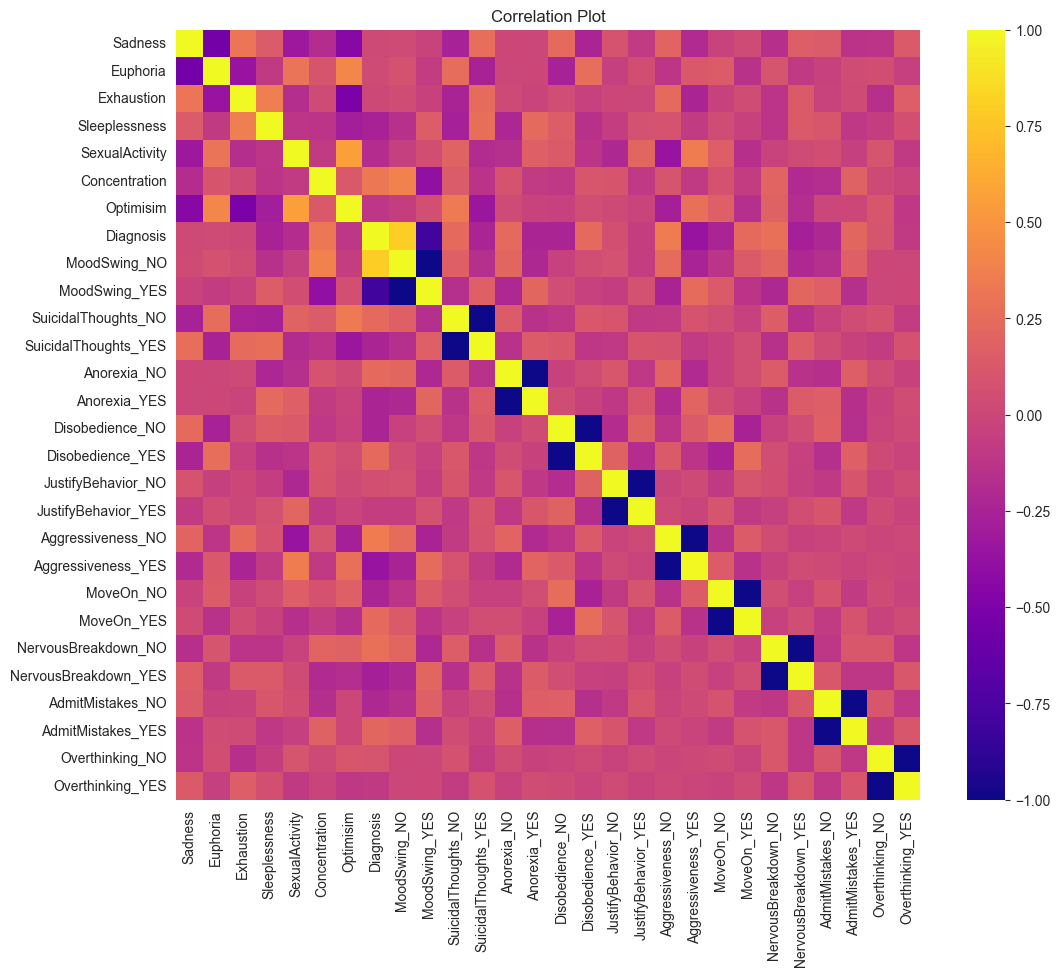

In [82]:
# 1.3.5 Correlation plots

plt.figure(figsize=(12, 10))
sns.heatmap(encoded_df.corr(), annot=False, cmap='plasma', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

From the correlation plot above, the lighter colored squares are more positvely (linearly) correlated with the other features. The darker colored squares indicate a negative (linear) correlation. 

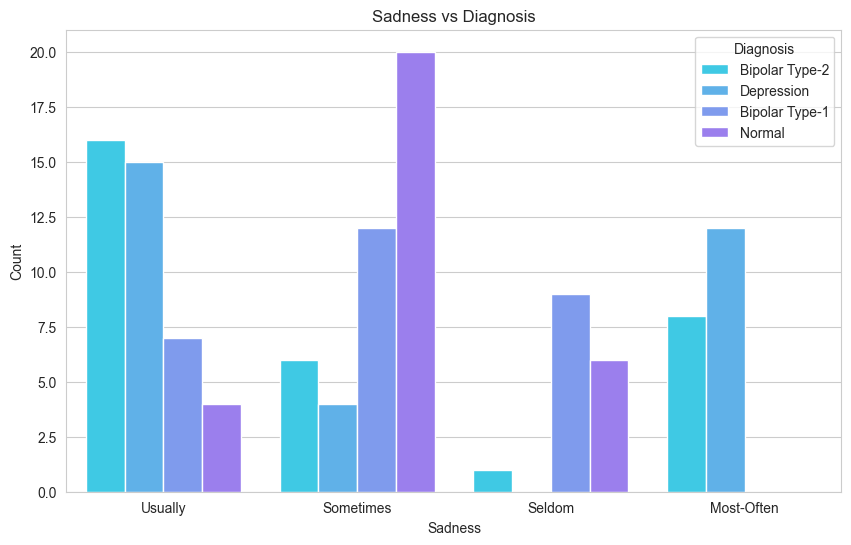

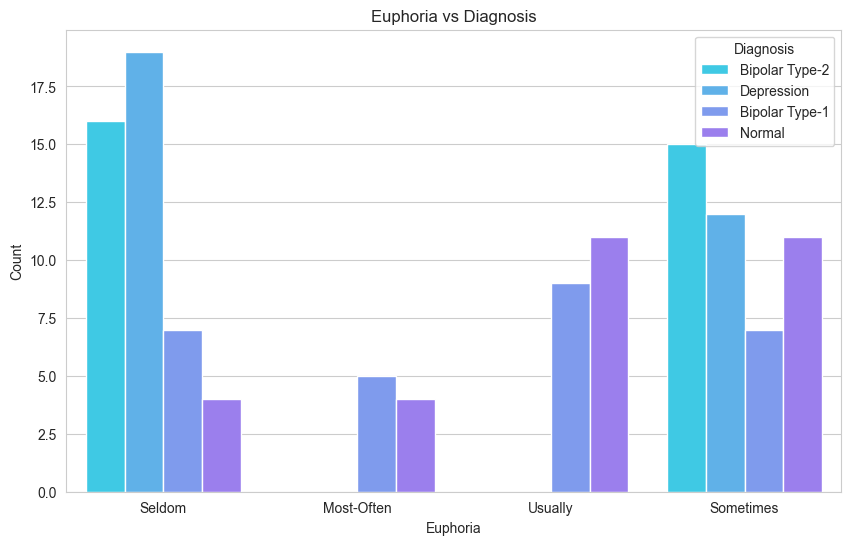

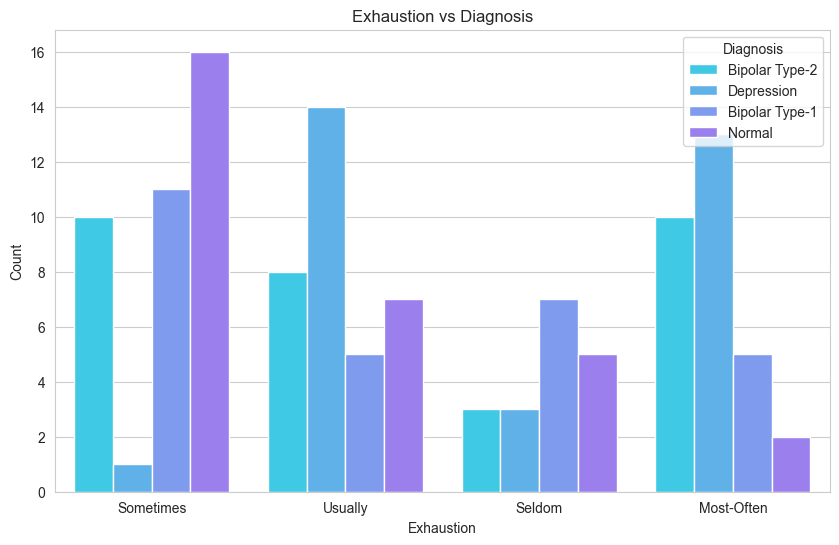

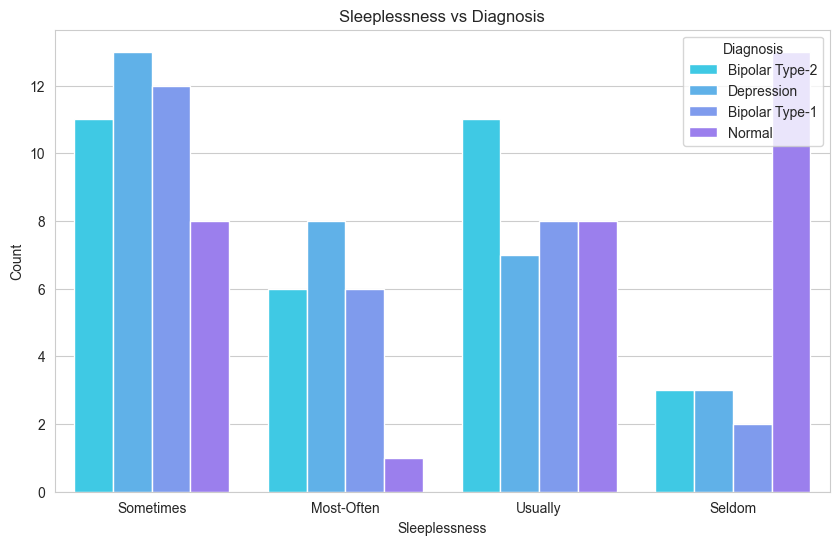

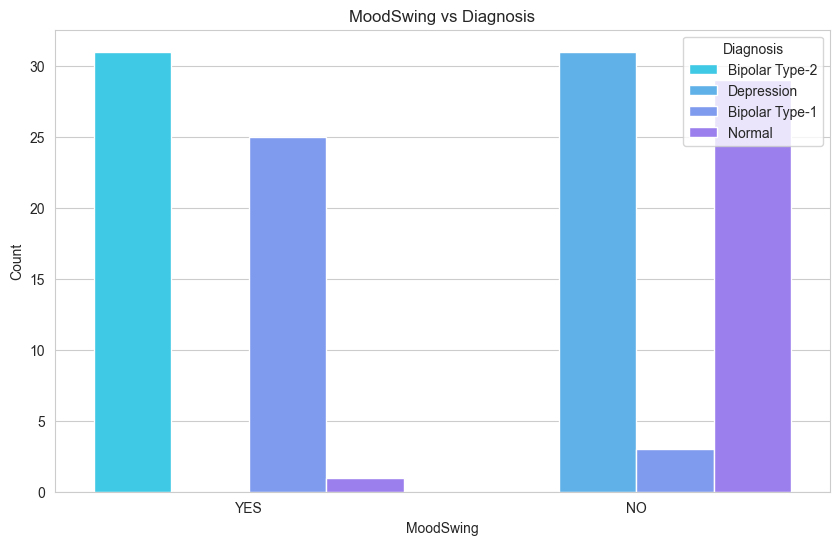

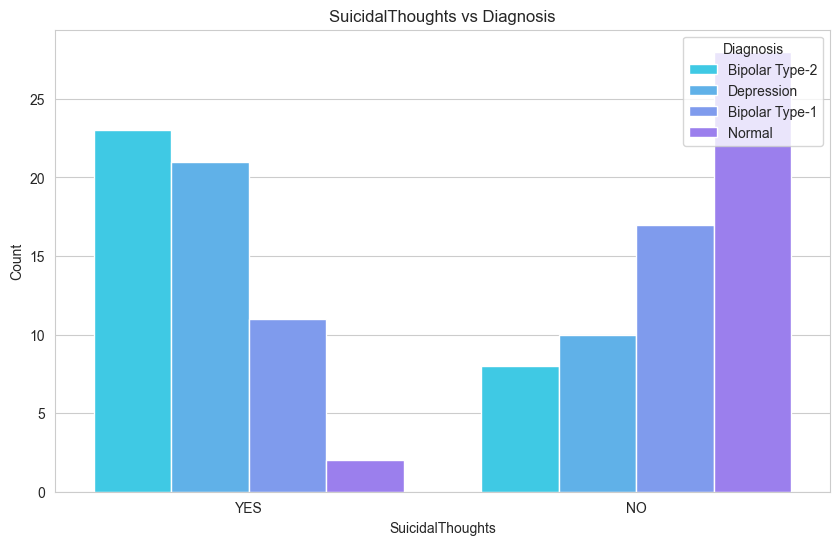

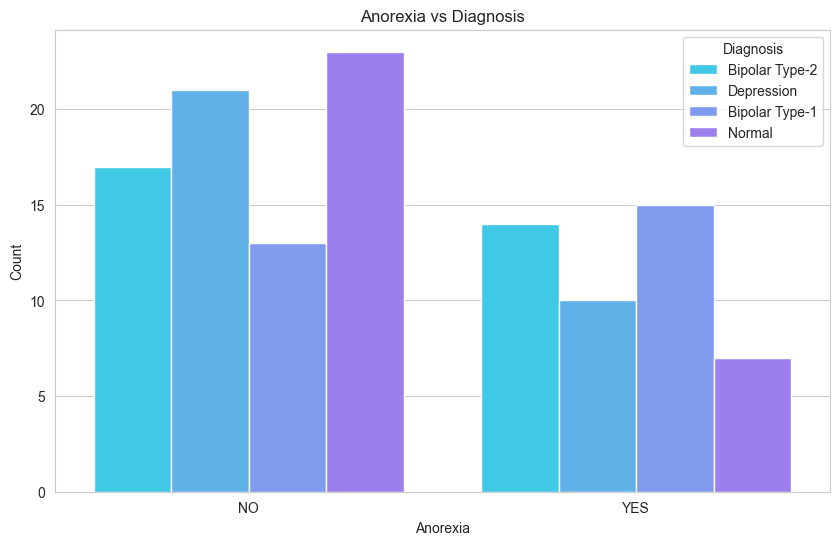

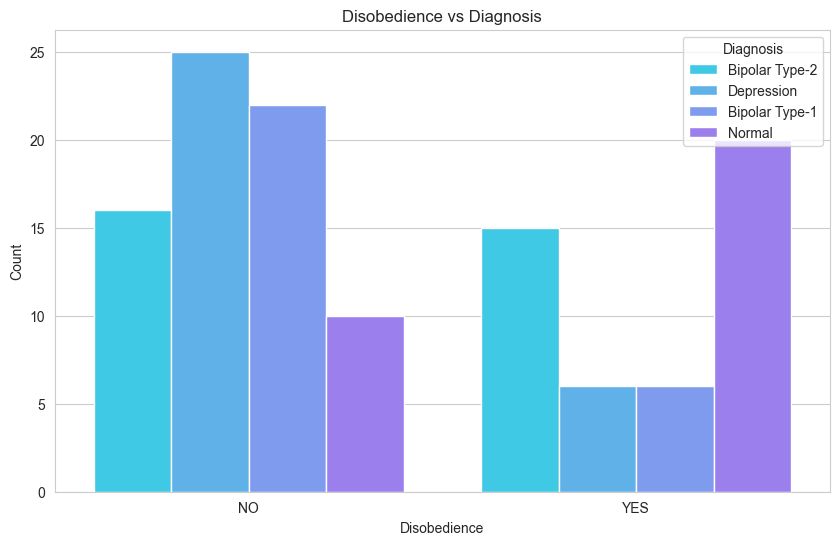

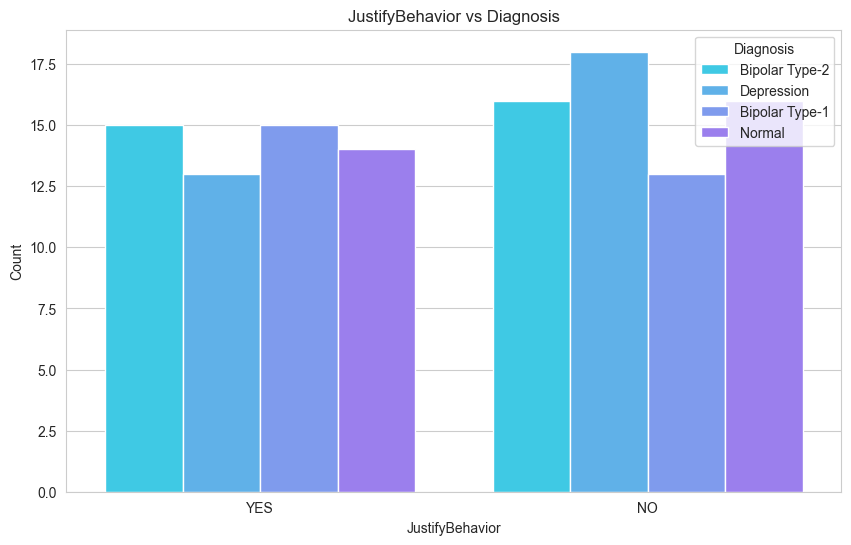

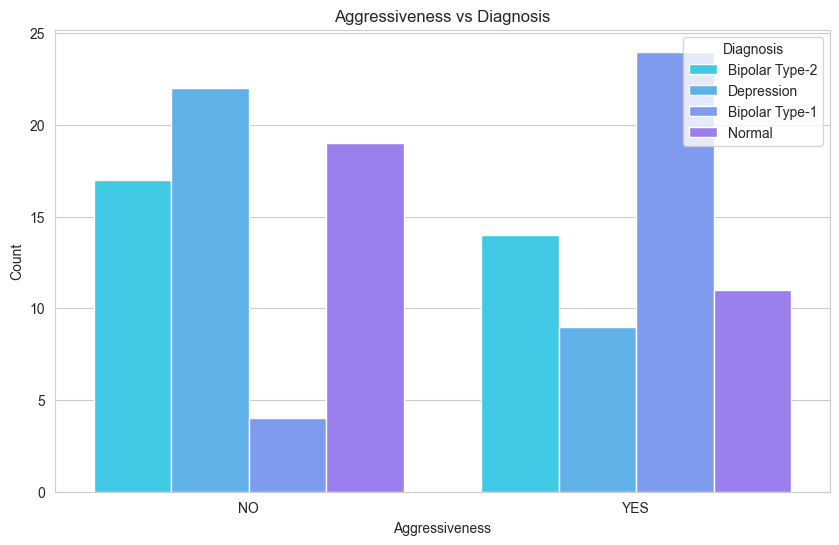

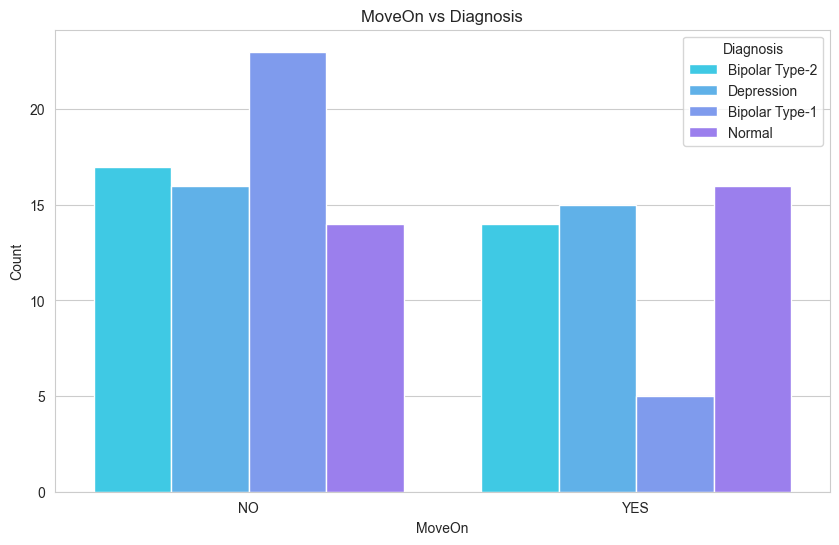

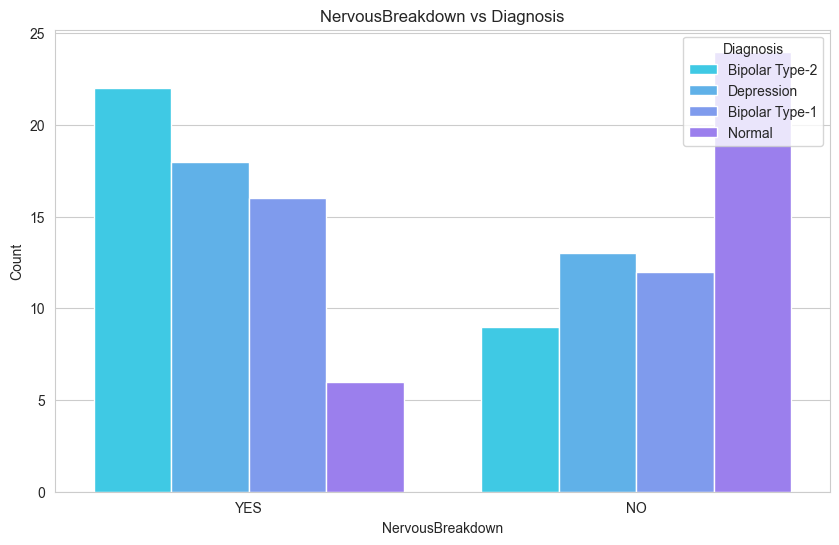

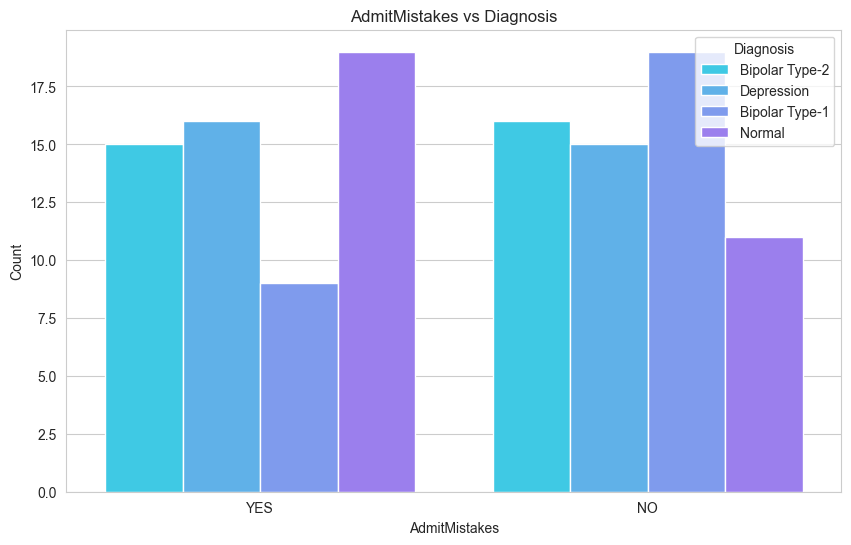

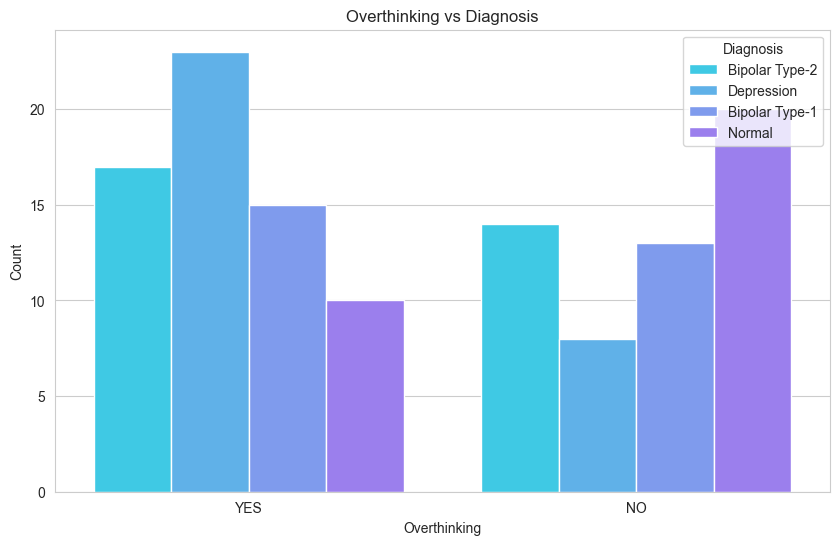

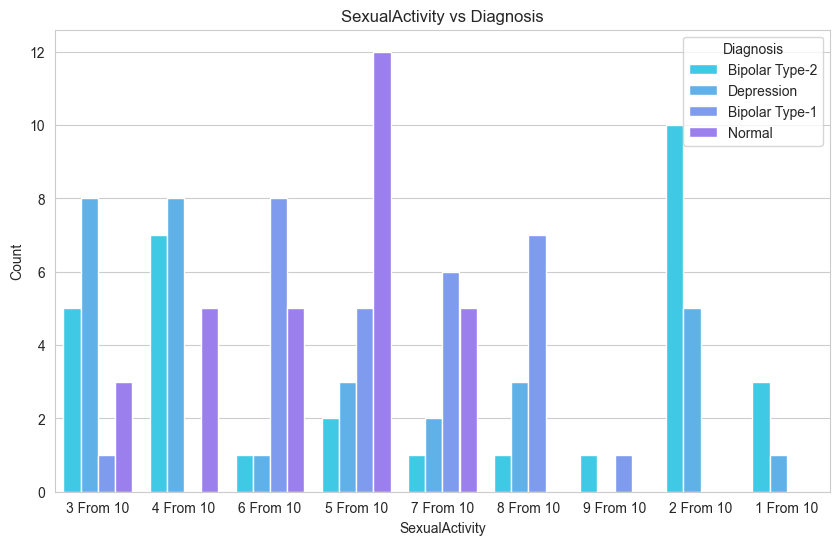

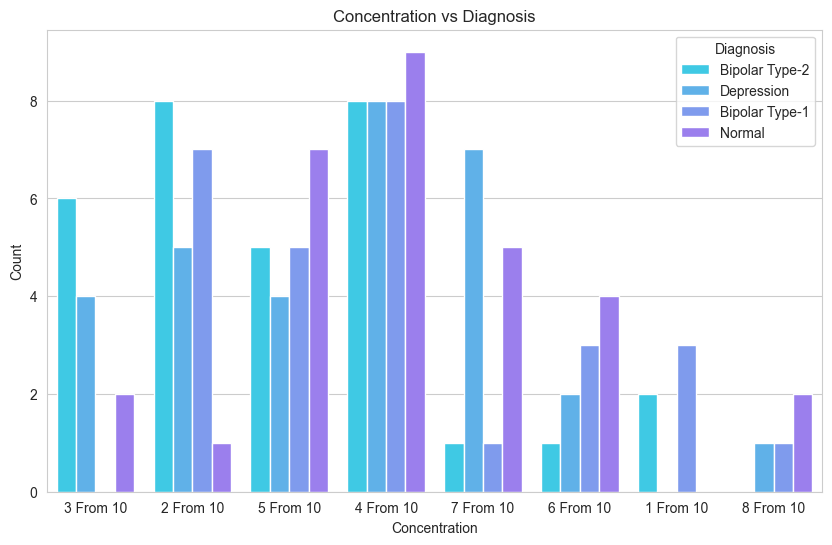

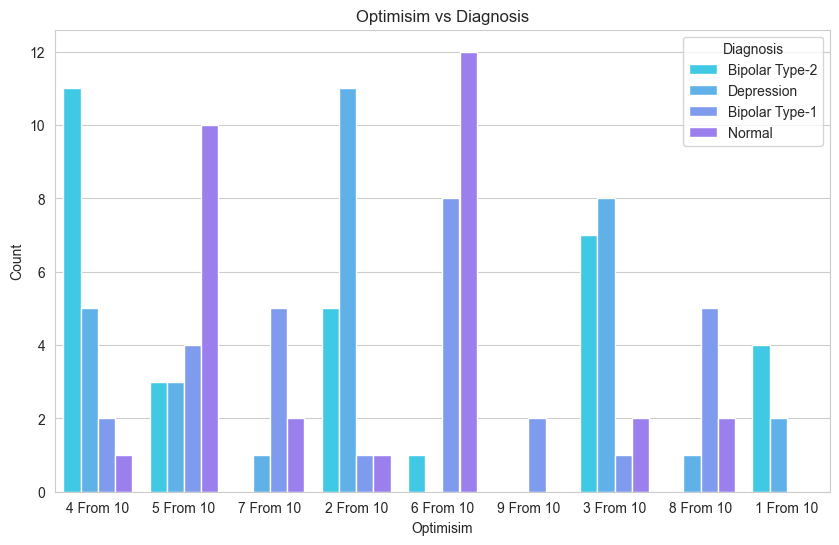

In [46]:
# 1.3.6. Data Distribution (plot features against Target variable)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("cool")

for col in mood_data.columns:
    if col != 'Diagnosis':  
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Diagnosis', data=mood_data)
        plt.title(f'{col} vs Diagnosis')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Diagnosis', loc='upper right')
        plt.show()


### Model Building / Model Evaluation & Comparison

### Decision Tree

Since all of the data contains categories, ordered levels and binary responses, we will use decision trees and random forests for our machine learning models. 

In [47]:
from sklearn import set_config
set_config(display='diagram')

In [48]:
# define the features and target variables 

features = encoded_df.drop(columns='Diagnosis')
target = encoded_df['Diagnosis']

In [107]:
# 1.5 Model Building 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    random_state=123, 
    test_size=0.20
)

In [108]:
# 1.5.2 Decision Tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


decision_tree = DecisionTreeClassifier(max_depth=4 , min_samples_leaf=10)

# Train the decision tree
decision_tree = decision_tree.fit(X_train,y_train)

# Predicted the response
y_pred = decision_tree.predict(X_test)


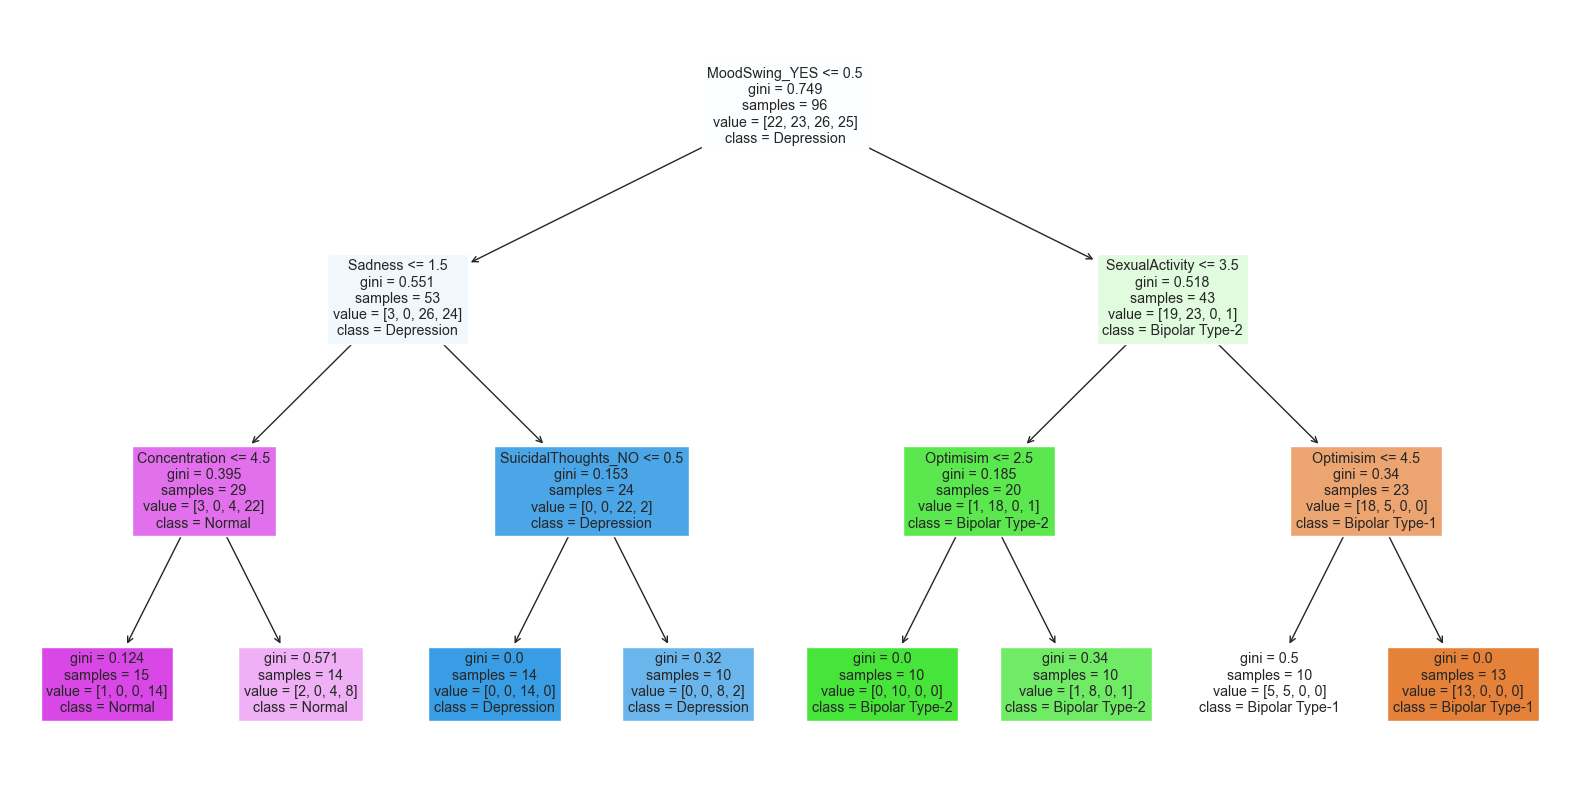

In [109]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns.tolist(), class_names=label_encoder.classes_.tolist())
plt.show()

In [110]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.875


Without setting any parameters in the initial tree, the model was very overfitted. This is because the size of the data was small, and the `max_depth` of the tree was not specified. Controlling the nodes / pruning the tree will prevent overfitting.

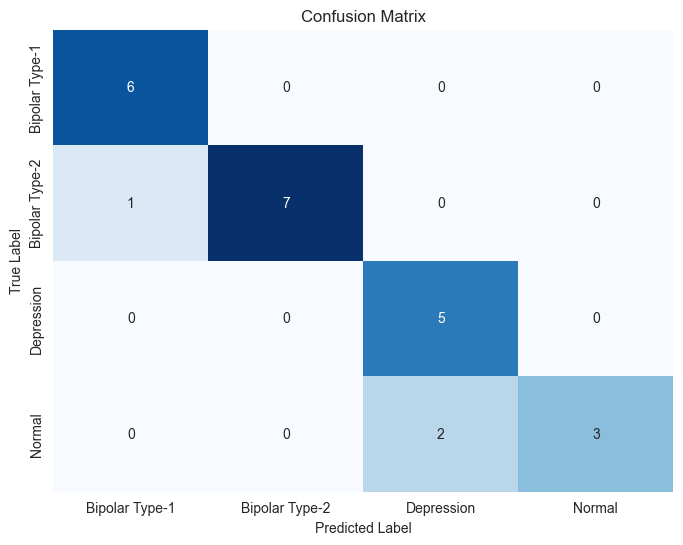

In [111]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
classes = ['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal']
conf_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


We can see from the confusion matrix, most of the predicted values match the actual observed values in the data set. The accuracy score from the decision tree is `0.875` which is close to 1. This is indicative of a quality model 

### Random Forests

In [112]:
# 1.5.2 Random Forest Classifier 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    random_state=124, 
    test_size=0.20
)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [114]:
# Hyperparameter tuning 

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Find the best parameters 
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)


best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 117}


In [115]:
y_pred = best_rf.predict(X_test)

In [116]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", round(accuracy, 2))

Accuracy: 0.96


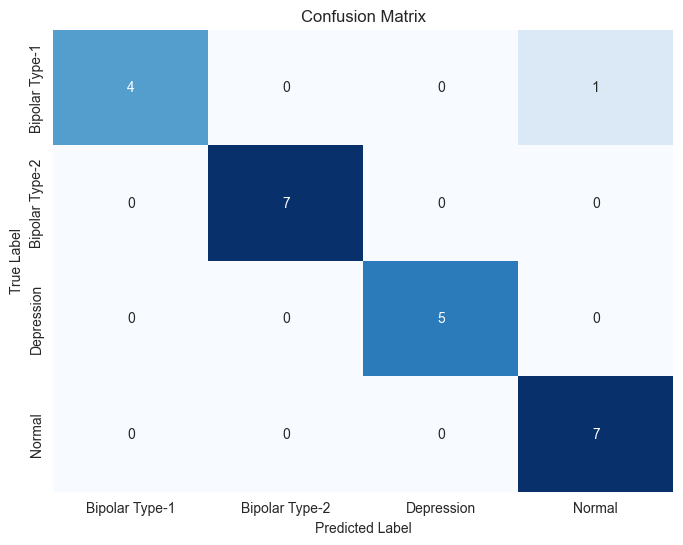

In [117]:
conf_matrix = confusion_matrix(y_test, y_pred)
classes = ['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal']
conf_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

From the metrics above, the random forest classifer model performs better than the decision tree. The accuracy score for the `rf()` model was `96%` and based on the confusion matrix, only 1 of the values was misclassified. 